In [1]:
import pandas as pd
import numpy as np
import os, sys
sys.path.insert(0, os.path.abspath('../..'))
import source.data_preparation as dp
import source.regression_models as modl
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Example


In [2]:
data = dp.prepare_data()

/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [3]:
# Pick the monthly variables you actually have in `data`:
monthly_vars = [
    "vp","impvar","vrp","lzrt","ogap","wtexas","sntm","ndrbL","skvw","tail",
    "fbm","dtoy","dtoat","ygap","rdsp","rsvix","tchi","avgcor","shtint",
    "disag","ntis","tby","lty","ltr","tms","dfy","dfr","infl"
]
monthly_vars = [v for v in monthly_vars if v in data.columns]

ranking = modl.rank_monthly_predictors(
    data,
    monthly_vars=monthly_vars,
    start_date="1927-01-01",
    start_oos="1965-01-01",
    lag=1,
    quiet=True,  # set False to see printed ranking
)


Monthly predictors ranked (worst → best) by OOS R²:
 1.      rsvix   R²_OOS = -0.0713
 2.     impvar   R²_OOS = -0.0594
 3.      disag   R²_OOS = -0.0255
 4.     shtint   R²_OOS = -0.0177
 5.       ntis   R²_OOS = -0.0153
 6.       ygap   R²_OOS = -0.0150
 7.         vp   R²_OOS = -0.0129
 8.       dtoy   R²_OOS = -0.0126
 9.       skvw   R²_OOS = -0.0122
10.        vrp   R²_OOS = -0.0119
11.       rdsp   R²_OOS = -0.0107
12.       tail   R²_OOS = -0.0106
13.        fbm   R²_OOS = -0.0106
14.        dfr   R²_OOS = -0.0103
15.        ltr   R²_OOS = -0.0103
16.       sntm   R²_OOS = -0.0096
17.      dtoat   R²_OOS = -0.0088
18.        tms   R²_OOS = -0.0087
19.     avgcor   R²_OOS = -0.0087
20.        dfy   R²_OOS = -0.0086
21.       lzrt   R²_OOS = -0.0081
22.       tchi   R²_OOS = -0.0070
23.       infl   R²_OOS = -0.0055
24.     wtexas   R²_OOS = -0.0049
25.        lty   R²_OOS = -0.0041
26.       ogap   R²_OOS = -0.0041


[OLS(ogap)] Device=cpu | Valid months=720 | MSE=0.001914 | RMSE=0.043744 | R²_OS=-0.0041


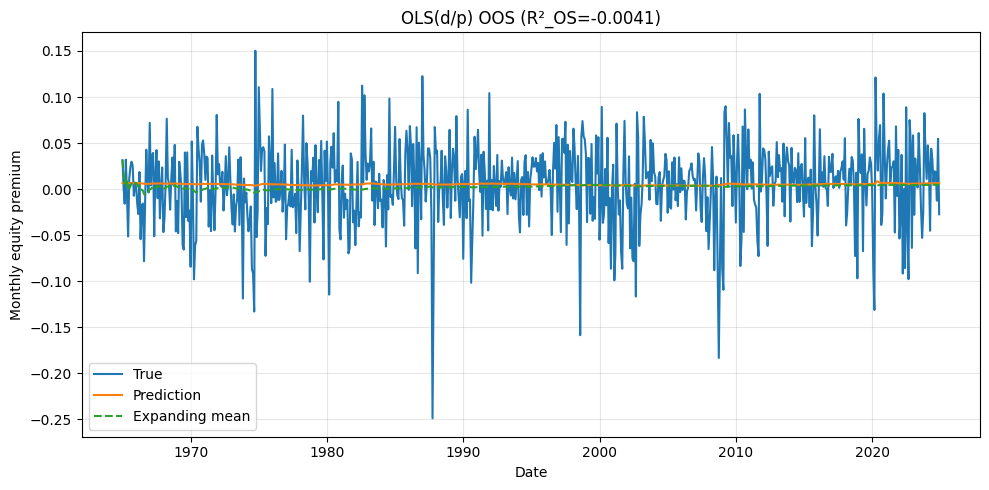

In [4]:
from importlib import reload
reload(modl)
r2_o, y_true_o, y_pred_o, dates_o = modl.ols_oos(data, variables=("ogap",), start_oos="1965-01-01", mode="mean", ct_cutoff = True)

modl.plot_oos(
    y_true_o, y_pred_o, dates=dates_o,
    title=f"OLS(d/p) OOS (R²_OS={r2_o:.4f})",
    ylabel="Monthly equity premium",
    mode = "mean"
)


/Users/kilianrunnwerth/Masterarbeit/source/modelling_utils.py:171: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  z = z[~z.index.duplicated(keep="last")].sort_index().asfreq(freq)
`torch_dtype` is deprecated! Use `dtype` instead!
`torch_dtype` is deprecated! Use `dtype` instead!


[Chronos-Bolt] prediction_length=1, origins=720, first_origin=1965-01-31, last_origin=2024-12-31
[Chronos-Bolt (h=1)] Device=cpu | Valid months=720 | MSE=0.001923 | RMSE=0.043855 | R²_OS=-0.0092


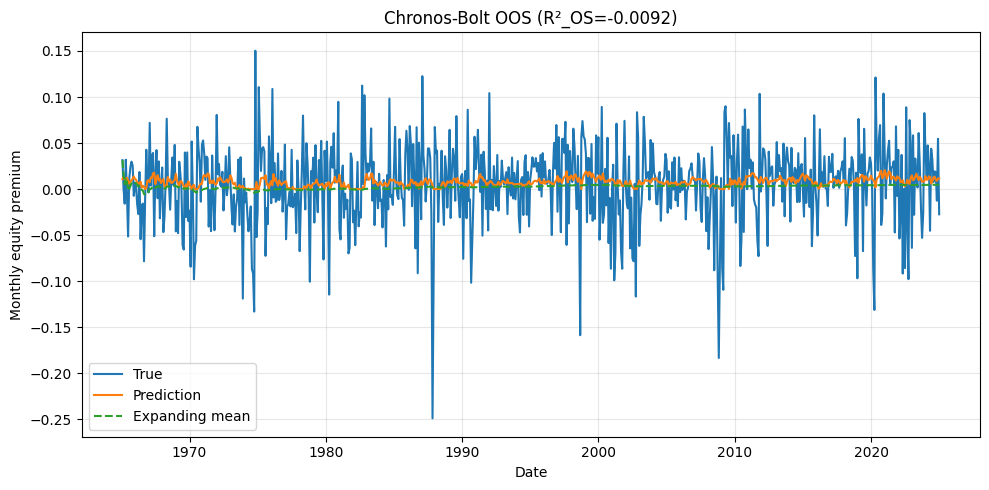

In [5]:
r2_c, y_true_c, y_pred_c, dates_c = modl.chronos_oos(data, start_oos="1965-01-01", quiet=False, ct_cutoff=True, freq='M', mode= "mean")

modl.plot_oos(
    y_true_c[1], y_pred_c[1], dates=dates_c[1],
    title=f"Chronos-Bolt OOS (R²_OS={r2_c[1]:.4f})",
    ylabel="Monthly equity premium", mode = "mean"
)


In [6]:
vars_gw = ['d/p','d/y','e/p','tms','dfy','dfr','tbl','ltr','infl','svar','b/m','ntis','cay']
vars_core = ['d/p','e/p','tms','dfy','tbl','ltr','infl','svar','cay']

xgb_params = dict(
    n_estimators=1200, max_depth=2, learning_rate=0.01,
    subsample=0.7, colsample_bytree=0.7, reg_lambda=2.0,
    objective="reg:squarederror", random_state=42
)
# r2_te, y_true_te, y_pred_te, dates_te = modl.tree_ensemble_oos(data, vars_core, model_params=xgb_params, ct_cutoff=True)
# print("Tree ensemble OOS R²:", r2)
# # choose some variables you have
# vars_for_tree = ["tms","dfy","ntis"]

# modl.plot_oos(
#     y_true_te, y_pred_te, dates=dates_te,
#     title=f"Tree Ensemble OOS ({','.join(vars_for_tree)})  R²_OS={r2_te:.4f}",
#     ylabel="Monthly equity premium"
# )
r2_t, y_true_t, y_pred_t, dates_t = modl.tree_ensemble_oos(data, variables=vars_core, ct_cutoff=True, model_params=xgb_params, mode = "mean")
    
modl.plot_oos(
    y_true_t, y_pred_t, dates=dates_t,
    title=f"Tree Ensemble OOS (R²_OS={r2_t:.4f})",
    ylabel="Monthly equity premium",mode = "mean"
)

KeyboardInterrupt: 

[TimesFM] Using device hint: mps


/Users/kilianrunnwerth/Masterarbeit/source/modelling.py:174: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  z = z[~z.index.duplicated(keep="last")].sort_index().asfreq(freq)
INFO:p-3221:t-8800067776:timesfm_2p5_torch.py:_from_pretrained:Downloading checkpoint from Hugging Face repo google/timesfm-2.5-200m-pytorch
INFO:p-3221:t-8800067776:timesfm_2p5_torch.py:_from_pretrained:Loading checkpoint from: /Users/kilianrunnwerth/.cache/huggingface/hub/models--google--timesfm-2.5-200m-pytorch/snapshots/1d952420fba87f3c6dee4f240de0f1a0fbc790e3/model.safetensors


[TimesFM] prediction_length=1, origins=196, first_origin=2008-09-30, last_origin=2024-12-31
[TimesFM (h=1)] Device=cpu | Valid months=196 | MSE=0.002148 | RMSE=0.046348 | R²_OS=-0.0618


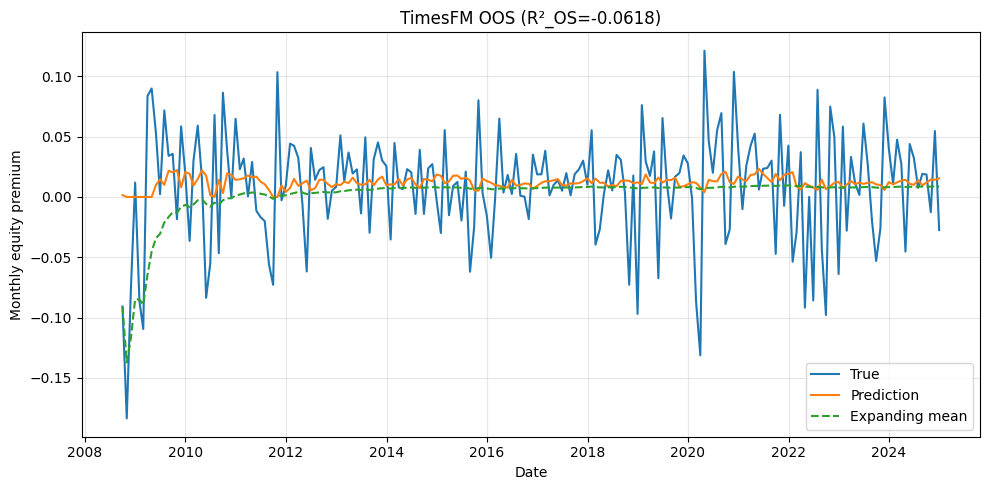

In [ ]:


r2_tf, y_true_tf, y_pred_tf, dates_tf = modl.timesfm_oos(
    data, start_oos="2008-09-01", min_context=120, max_context=512, ct_cutoff=True, quiet=False, freq="M",mode = "mean"
)

modl.plot_oos(
    y_true_tf[1], y_pred_tf[1], dates=dates_tf[1],
    title=f"TimesFM OOS (R²_OS={r2_tf[1]:.4f})",
    ylabel="Monthly equity premium", mode = "mean"
)


[Moirai2] Using freq='M' (month-end) | ctx=240 | H=1


/Users/kilianrunnwerth/Masterarbeit/source/modelling.py:836: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cov_df = df[list(covariates)].astype("float32")


[Moirai 2 (reinstantiated each step)] prediction_length=1, origins=720, first_origin=1965-01-31, last_origin=2024-12-31


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/gluonts/dataset/common.py:254: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ProcessDataEntry(to_offset(freq), one_dim_target, use_timestamp),


[Moirai 2 (reinstantiated each step) (h=1)] Device=cpu | Valid months=720 | MSE=0.001945 | RMSE=0.044107 | R²_OS=-0.0208


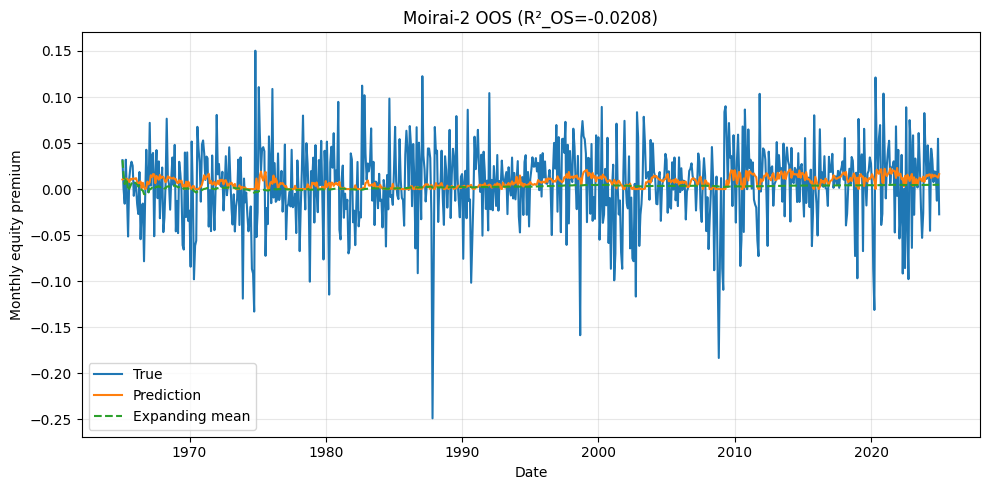

In [ ]:
r2_m, y_true_m, y_pred_m, dates_m = modl.moirai2_oos(
    data, covariates=(), start_oos="1965-01-01",
    ctx=240, device="cpu", ct_cutoff=True, quiet=False, mode = "mean"
)

modl.plot_oos(
    y_true_m[1], y_pred_m[1], dates=dates_m[1],
    title=f"Moirai-2 OOS (R²_OS={r2_m[1]:.4f})",
    ylabel="Monthly equity premium", mode = "mean"
)

[Moirai2] Using freq='M' (month-end) | ctx=240 | H=1


/Users/kilianrunnwerth/Masterarbeit/source/modelling.py:836: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cov_df = df[list(covariates)].astype("float32")


[Moirai 2 (reinstantiated each step)] prediction_length=1, origins=720, first_origin=1965-01-31, last_origin=2024-12-31


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/gluonts/dataset/common.py:254: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ProcessDataEntry(to_offset(freq), one_dim_target, use_timestamp),


[Moirai 2 (reinstantiated each step) (h=1)] Device=cpu | Valid months=720 | MSE=0.002308 | RMSE=0.048046 | R²_OS=-0.2113


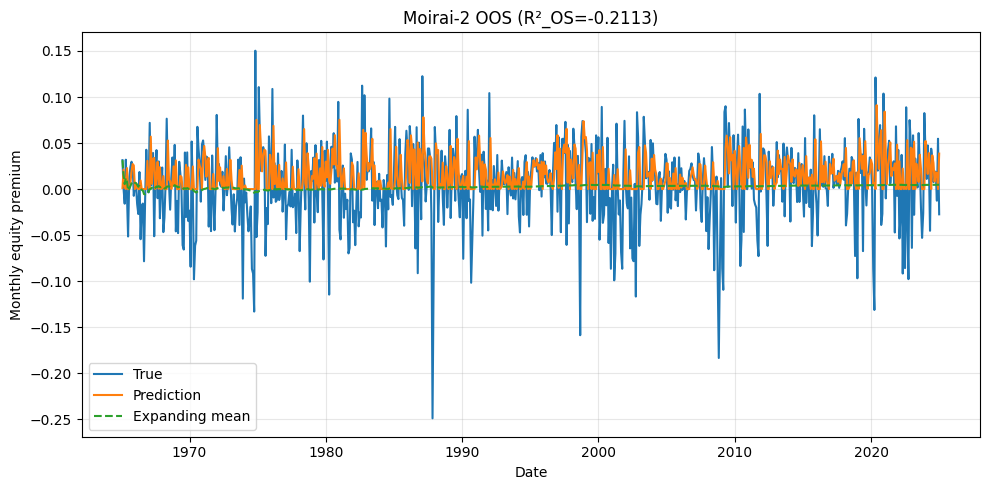

In [ ]:
r2_m, y_true_m, y_pred_m, dates_m = modl.moirai2_oos(
    data, covariates=("d/p","tms","dfy"), start_oos="1965-01-01",
    ctx=240, device="cpu", ct_cutoff=True, quiet=False, mode = "mean"
)

modl.plot_oos(
    y_true_m[1], y_pred_m[1], dates=dates_m[1],
    title=f"Moirai-2 OOS (R²_OS={r2_m[1]:.4f})",
    ylabel="Monthly equity premium", mode = "mean"
)

In [ ]:


r2, y_true, y_pred, dates_fs = modl.flowstate_oos(
    data, mode = "mean", ct_cutoff=True
)

/Users/kilianrunnwerth/Masterarbeit/source/modelling.py:751: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  alt = "M" if freq == "MS" else "MS"
INFO:p-3221:t-8800067776:modeling_flowstate.py:__init__:Number of encoder parameters: 7885.8240000000005k
INFO:p-3221:t-8800067776:modeling_flowstate.py:__init__:Number of dencoder parameters: 1181.952k (14.99%)


[FlowState (expanding)] prediction_length=1, origins=720, first_origin=1965-01-31, last_origin=2024-12-31
[FlowState (expanding) (h=1)] Device=cpu | Valid months=720 | MSE=0.001976 | RMSE=0.044456 | R²_OS=-0.0371


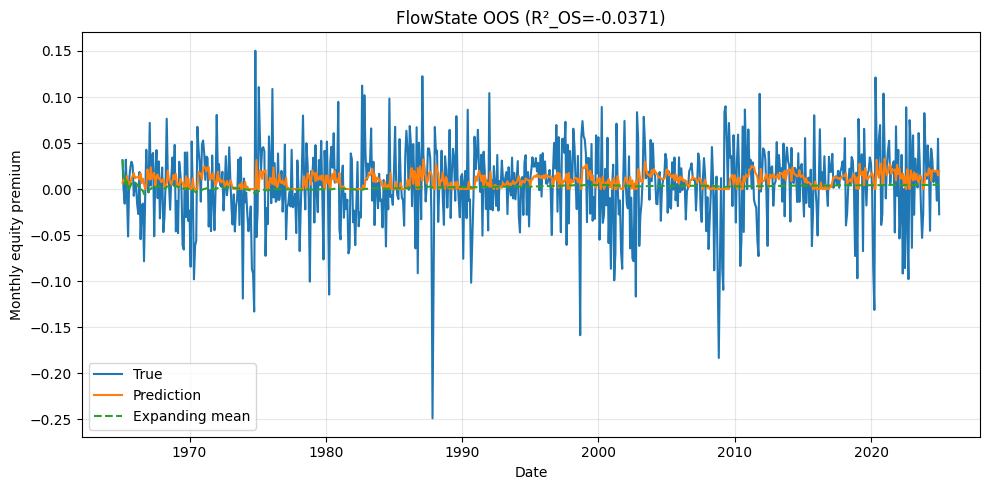

In [ ]:
modl.plot_oos(
    y_true[1],
    y_pred[1],
    dates=dates_fs[1],
    title=f"FlowState OOS (R²_OS={r2[1]:.4f})",
    ylabel="Monthly equity premium",
    mode = "mean"
)

In [ ]:
from importlib import reload
reload(modl)

<module 'source.modelling' from 'c:\\Users\\kilia\\Masterarbeit\\source\\modelling.py'>

In [ ]:
r2_tabpfn, y_true_tabpfn, y_pred_tabpfn, dates_tabpfn = modl.tabpfn_oos_fit_each_step(
    data,
    variables=("d/p", "tms", "dfy"),
    start_oos="1995-01-01",
    lag=1,
    min_train=120,
    ct_cutoff=True,
    quiet=False,
    # model_params={"N_ensemble_configurations": 8},  # ❌ remove this
    model_params='2.5',  # or just omit this argument,
    mode = "rw"
)




1995-01-01 00:00:00
1995-02-01 00:00:00
1995-03-01 00:00:00
1995-04-01 00:00:00
1995-05-01 00:00:00
1995-06-01 00:00:00
1995-07-01 00:00:00
1995-08-01 00:00:00
1995-09-01 00:00:00
1995-10-01 00:00:00
1995-11-01 00:00:00
1995-12-01 00:00:00
1996-01-01 00:00:00
1996-02-01 00:00:00
1996-03-01 00:00:00
1996-04-01 00:00:00
1996-05-01 00:00:00
1996-06-01 00:00:00
1996-07-01 00:00:00
1996-08-01 00:00:00
1996-09-01 00:00:00
1996-10-01 00:00:00
1996-11-01 00:00:00
1996-12-01 00:00:00
1997-01-01 00:00:00
1997-02-01 00:00:00
1997-03-01 00:00:00
1997-04-01 00:00:00
1997-05-01 00:00:00
1997-06-01 00:00:00
1997-07-01 00:00:00
1997-08-01 00:00:00
1997-09-01 00:00:00
1997-10-01 00:00:00
1997-11-01 00:00:00
1997-12-01 00:00:00
1998-01-01 00:00:00
1998-02-01 00:00:00
1998-03-01 00:00:00
1998-04-01 00:00:00
1998-05-01 00:00:00
1998-06-01 00:00:00
1998-07-01 00:00:00
1998-08-01 00:00:00
1998-09-01 00:00:00
1998-10-01 00:00:00
1998-11-01 00:00:00
1998-12-01 00:00:00
1999-01-01 00:00:00
1999-02-01 00:00:00


KeyboardInterrupt: 

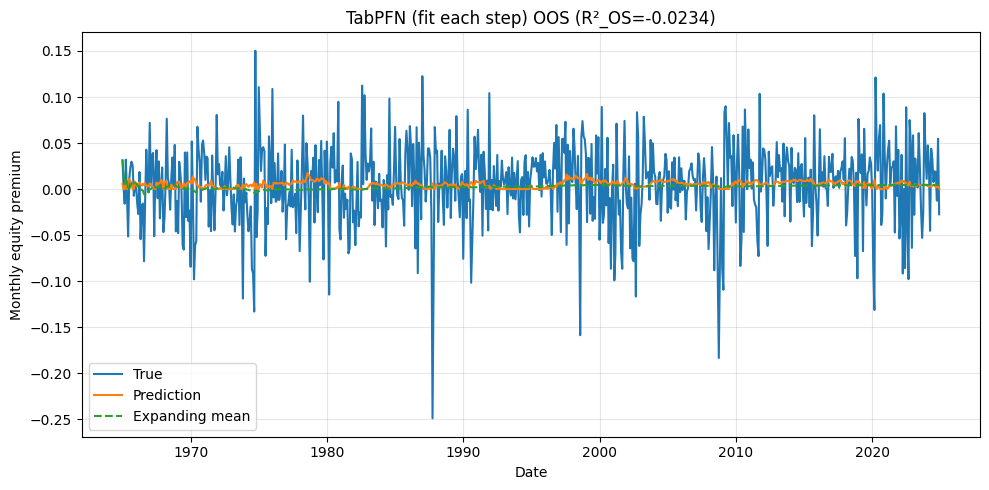

In [ ]:
modl.plot_oos(
    y_true_tabpfn, y_pred_tabpfn, dates=dates_tabpfn,
    title=f"TabPFN (fit each step) OOS (R²_OS={r2_tabpfn:.4f})",
    ylabel="Monthly equity premium"
)

In [ ]:
r2_pfn_ts, y_true_pfn_ts, y_pred_pfn_ts, dates_pfn_ts = modl.tabpfn_ts_oos_fit_each_step(
    data,
    target_col="equity_premium",
    start_oos="1965-01-01",
    ctx=240,
    freq="M",
    min_windows=120,
    ct_cutoff=False,
    quiet=False,
    fit_kwargs={"epochs": 1}  # if your build supports epochs
)

plot_oos(
    y_true_pfn_ts, y_pred_pfn_ts, dates=dates_pfn_ts,
    title=f"TabPFN-TS (fit each step) OOS (R²_OS={r2_pfn_ts:.4f})",
    ylabel="Monthly equity premium"
)


RuntimeError: tabpfn-ts not found. Install it first (`pip install tabpfn-ts`).

In [ ]:
!pip install tabpfn-ts

ERROR: Could not find a version that satisfies the requirement tabpfn-ts (from versions: none)

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for tabpfn-ts


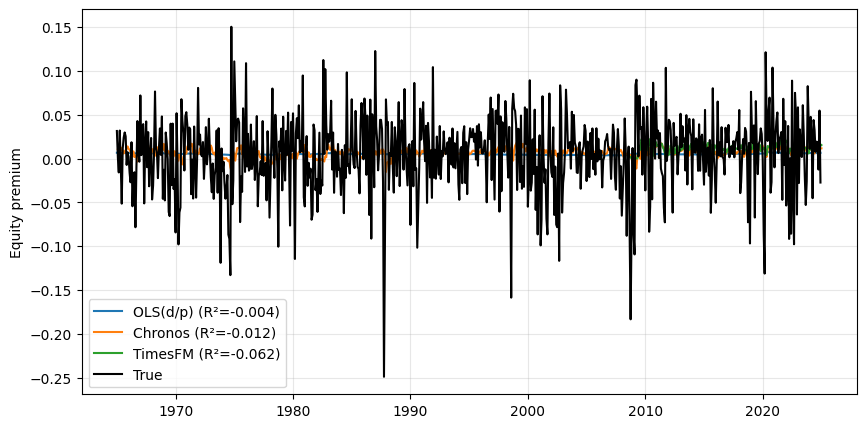

In [ ]:
# Example usage
results = {
    "OLS(d/p)": (r2_o, y_true_o, y_pred_o, dates_o),
    "Chronos": (r2_c[1], y_true_c[1], y_pred_c[1], dates_c[1]),
    "TimesFM": (r2_tf[1], y_true_tf[1], y_pred_tf[1], dates_tf[1]),
}
modl.plot_oos_multi(results)

/Users/kilianrunnwerth/Masterarbeit/source/modelling.py:125: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  z = z[~z.index.duplicated(keep="last")].sort_index().asfreq(freq)


[Chronos-Bolt] H=100, origins=621, first_origin=1965-01-31, last_origin=2016-09-30


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/chronos/chronos_bolt.py:525: UserWarning: We recommend keeping prediction length <= 64. The quality of longer predictions may degrade since the model is not optimized for it. 
  warnings.warn(msg)


[Chronos-Bolt (h=1)] Device=cpu | Valid months=621 | MSE=0.001898 | RMSE=0.043561 | R²_OS=-0.0147
[Chronos-Bolt (h=2)] Device=cpu | Valid months=621 | MSE=0.001912 | RMSE=0.043722 | R²_OS=-0.0225
[Chronos-Bolt (h=3)] Device=cpu | Valid months=621 | MSE=0.001906 | RMSE=0.043657 | R²_OS=-0.0190
[Chronos-Bolt (h=4)] Device=cpu | Valid months=621 | MSE=0.001916 | RMSE=0.043768 | R²_OS=-0.0245
[Chronos-Bolt (h=5)] Device=cpu | Valid months=621 | MSE=0.001912 | RMSE=0.043728 | R²_OS=-0.0231
[Chronos-Bolt (h=6)] Device=cpu | Valid months=621 | MSE=0.001920 | RMSE=0.043819 | R²_OS=-0.0268
[Chronos-Bolt (h=7)] Device=cpu | Valid months=621 | MSE=0.001913 | RMSE=0.043736 | R²_OS=-0.0245
[Chronos-Bolt (h=8)] Device=cpu | Valid months=621 | MSE=0.001911 | RMSE=0.043716 | R²_OS=-0.0238
[Chronos-Bolt (h=9)] Device=cpu | Valid months=621 | MSE=0.001918 | RMSE=0.043793 | R²_OS=-0.0278
[Chronos-Bolt (h=10)] Device=cpu | Valid months=621 | MSE=0.001915 | RMSE=0.043760 | R²_OS=-0.0269
[Chronos-Bolt (h=11

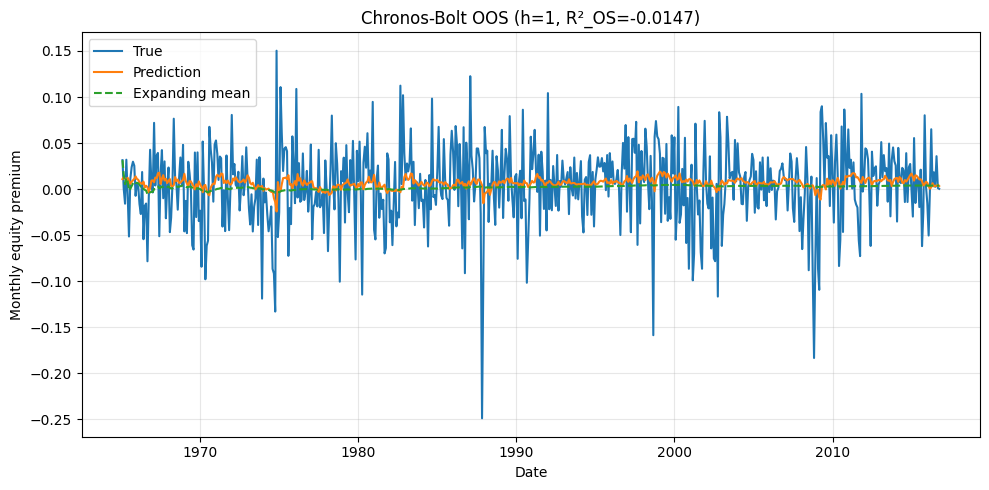

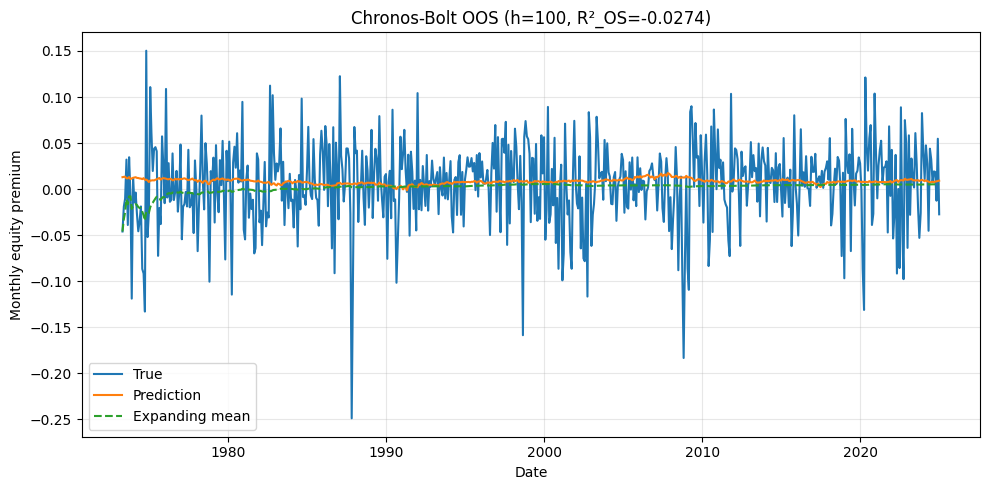

In [ ]:
from importlib import reload
reload(mm)
import source.modelling_multistep as mm
# 12-step multi-horizon OOS with Chronos
r2_c, y_true_c, y_pred_c, dates_c = mm.chronos_oos_multistep(
    data,
    start_oos="1965-01-01",
    prediction_length=100,
    ct_cutoff=False,
    quiet=False,
    freq="M",
)

# Check R² by horizon
for h in range(1, 13):
    print(f"h={h}: R²_OS = {r2_c[h]:.4f}")

# Plot horizon-1 forecast
h = 1
modl.plot_oos(
    y_true_c[h], y_pred_c[h], dates=dates_c[h],
    title=f"Chronos-Bolt OOS (h={h}, R²_OS={r2_c[h]:.4f})",
    ylabel="Monthly equity premium",
)

# Plot horizon-12 forecast
h = 100
modl.plot_oos(
    y_true_c[h], y_pred_c[h], dates=dates_c[h],
    title=f"Chronos-Bolt OOS (h={h}, R²_OS={r2_c[h]:.4f})",
    ylabel="Monthly equity premium",
)


In [12]:
from importlib import reload
reload(modl)    
import warnings
warnings.filterwarnings('ignore')  # Suppress all warnings

r2_auto, trues_auto, preds_auto, dates_auto = modl.autoarima_oos(
    data=data,
    target_col="equity_premium",
    start_oos="1970-01-01",
    freq="M",
    min_history_months=60,
    auto_arima_kwargs={"max_p": 3, "max_q": 3},
    order_search_every=15,   # search only once (first step)
    refit_each_step=True,      # <-- keep refitting model each step
    mode = "rw",
)


[AutoARIMA] prediction_length=1, origins=660, first_origin=1970-01-31, last_origin=2024-12-31
1970-01-31 00:00:00
[AutoARIMA] Searching best order at 1970-01-31...
  best order=(2, 0, 2), seasonal_order=(0, 0, 0, 12)
1970-02-28 00:00:00
1970-03-31 00:00:00
1970-04-30 00:00:00
1970-05-31 00:00:00
1970-06-30 00:00:00
1970-07-31 00:00:00
1970-08-31 00:00:00
1970-09-30 00:00:00
1970-10-31 00:00:00
1970-11-30 00:00:00
1970-12-31 00:00:00
1971-01-31 00:00:00
1971-02-28 00:00:00
1971-03-31 00:00:00
1971-04-30 00:00:00
[AutoARIMA] Searching best order at 1971-04-30...
  best order=(2, 0, 2), seasonal_order=(0, 0, 0, 12)
1971-05-31 00:00:00
1971-06-30 00:00:00
1971-07-31 00:00:00
1971-08-31 00:00:00
1971-09-30 00:00:00
1971-10-31 00:00:00
1971-11-30 00:00:00
1971-12-31 00:00:00
1972-01-31 00:00:00
1972-02-29 00:00:00
1972-03-31 00:00:00
1972-04-30 00:00:00
1972-05-31 00:00:00
1972-06-30 00:00:00
1972-07-31 00:00:00
[AutoARIMA] Searching best order at 1972-07-31...
  best order=(2, 0, 2), season